# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [8]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np


url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [9]:
def split_number_to_list_of_bits(number):
    binary = '{0:08b}'.format(number)
    lista = np.array([int(bit) << (7 - idx) for idx, bit in enumerate(binary)])
    return lista


img = cv2.imread(fileName)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [10]:
height = len(img)
width = len(img[0])
interpolation = 'antialiased'
# interpolation = 'none'
new_images = np.zeros((8, height, width))

In [11]:
for r in range(height):
    for c in range(width):
        list_of_images = split_number_to_list_of_bits(img[r][c])
        for i in range(len(list_of_images)):
            new_images[i][r][c] = list_of_images[i]

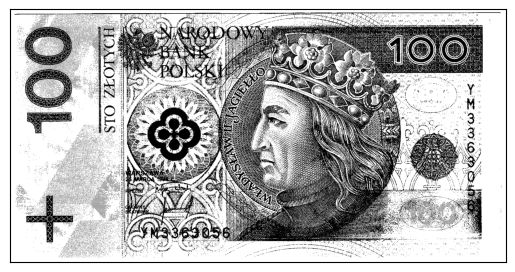

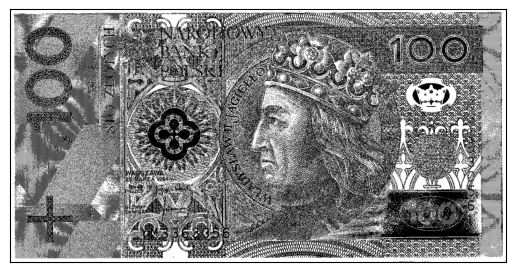

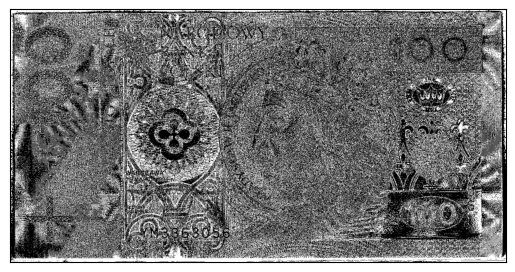

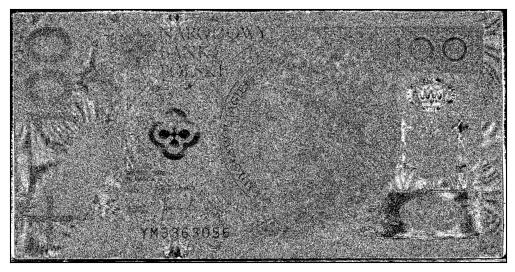

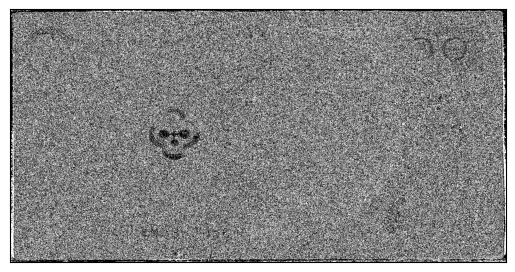

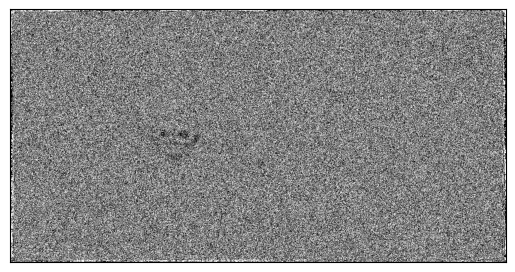

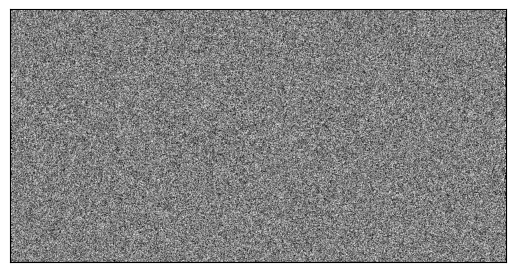

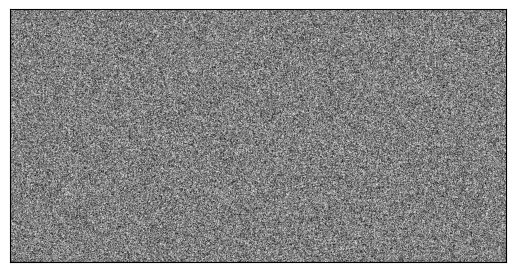

In [12]:
for i in range(len(new_images)):
    plt.imshow(new_images[i], interpolation=interpolation)
    plt.gray()
    plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False) 
    plt.show()

In [13]:
two_most_important_bits = np.zeros((height, width))
three_most_important_bits = np.zeros((height, width))
four_most_important_bits = np.zeros((height, width))
for r in range(height):
    for c in range(width):
        two_most_important_bits[r][c] = new_images[0][r][c] + new_images[1][r][c]
        three_most_important_bits[r][c] = two_most_important_bits[r][c] + new_images[2][r][c]
        four_most_important_bits[r][c] = three_most_important_bits[r][c] + new_images[3][r][c]

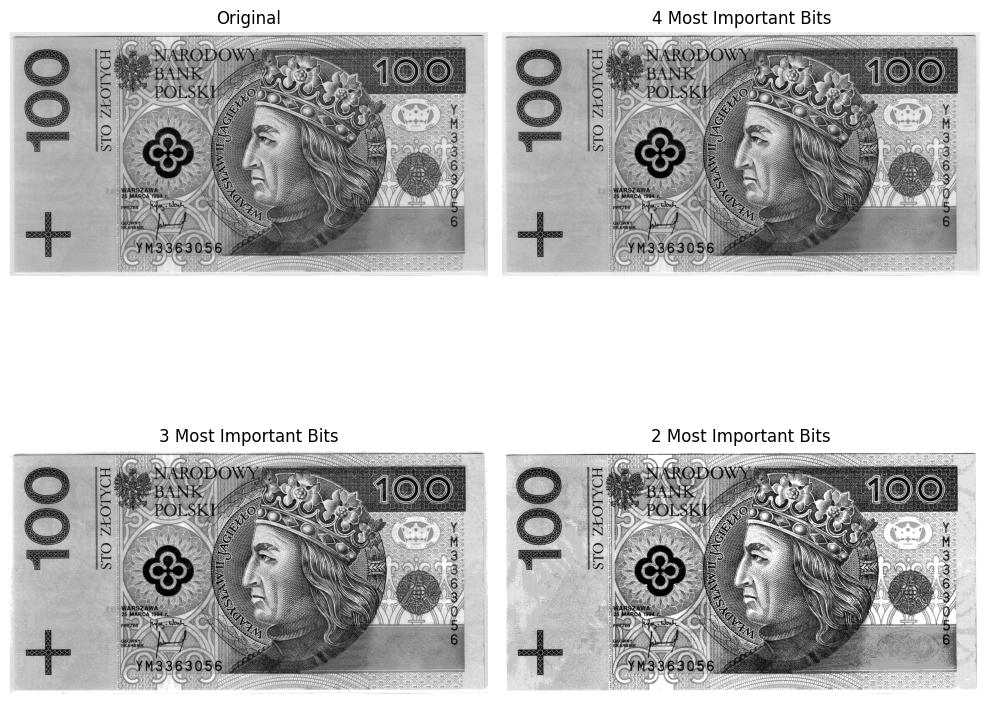

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(img, cmap='gray', interpolation=interpolation) 
axs[0, 1].imshow(four_most_important_bits, cmap='gray', interpolation=interpolation)
axs[1, 0].imshow(three_most_important_bits, cmap='gray', interpolation=interpolation)
axs[1, 1].imshow(two_most_important_bits, cmap='gray', interpolation=interpolation)

axs[0, 0].set_title('Original')
axs[0, 1].set_title('4 Most Important Bits')
axs[1, 0].set_title('3 Most Important Bits')
axs[1, 1].set_title('2 Most Important Bits')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()

plt.show()